In [40]:
import pandas as pd
import calendar
import hvplot.pandas
from sqlalchemy import create_engine
import csv
import numpy as np
import matplotlib.pyplot as plt


In [41]:
senator_csv = ('senators_fixed_dates_&amounts.csv')

senator_df = pd.read_csv(senator_csv).dropna()

print(senator_df)

       owner ticker asset_type            type     amount state       party  \
0     Spouse    ESS      Stock     Sale (Full)   $15,000     RI    Democrat   
1       Self    ESS      Stock     Sale (Full)   $15,000     RI    Democrat   
3     Spouse    UPS      Stock     Sale (Full)   $15,000     WV  Republican   
4     Spouse    MCD      Stock  Sale (Partial)   $15,000     WV  Republican   
5     Spouse    DUK      Stock     Sale (Full)   $50,000     WV  Republican   
...      ...    ...        ...             ...        ...   ...         ...   
7627    Self    NOG      Stock        Purchase   $50,000     ND  Republican   
7628    Self    FCX      Stock     Sale (Full)  $100,000     ND  Republican   
7640  Spouse    XOM      Stock     Sale (Full)   $15,000     KS  Republican   
7641  Spouse     BA      Stock        Purchase   $15,000     KS  Republican   
7642  Spouse    BAC      Stock     Sale (Full)   $15,000     KS  Republican   

                               industry            

In [42]:
# separate senators by party
keep_columns = ['party', 'senator', 'amount', 'ticker']
senator_party = senator_df[keep_columns]
print(senator_party)

           party               senator     amount ticker
0       Democrat    Sheldon Whitehouse   $15,000     ESS
1       Democrat    Sheldon Whitehouse   $15,000     ESS
3     Republican  Shelley Moore Capito   $15,000     UPS
4     Republican  Shelley Moore Capito   $15,000     MCD
5     Republican  Shelley Moore Capito   $50,000     DUK
...          ...                   ...        ...    ...
7627  Republican           John Hoeven   $50,000     NOG
7628  Republican           John Hoeven  $100,000     FCX
7640  Republican           Pat Roberts   $15,000     XOM
7641  Republican           Pat Roberts   $15,000      BA
7642  Republican           Pat Roberts   $15,000     BAC

[5501 rows x 4 columns]


In [43]:
democrat_party = senator_df[senator_df['party'] == 'Democrat']
republican_party = senator_df[senator_df['party'] == 'Republican']

print("Democrat DataFrame:")
print(democrat_party)

print("\nRepublican DataFrame:")
print(republican_party)


Democrat DataFrame:
       owner ticker asset_type            type    amount state     party  \
0     Spouse    ESS      Stock     Sale (Full)  $15,000     RI  Democrat   
1       Self    ESS      Stock     Sale (Full)  $15,000     RI  Democrat   
6     Spouse    TTD      Stock     Sale (Full)  $50,000     CO  Democrat   
7     Spouse   PTON      Stock     Sale (Full)  $15,000     CO  Democrat   
8     Spouse    DIS      Stock     Sale (Full)  $50,000     CO  Democrat   
...      ...    ...        ...             ...       ...   ...       ...   
7610   Child    ETN      Stock     Sale (Full)  $15,000     RI  Democrat   
7612   Joint    ETN      Stock     Sale (Full)  $50,000     RI  Democrat   
7613    Self    DHR      Stock  Sale (Partial)  $50,000     RI  Democrat   
7615    Self   GILD      Stock        Purchase  $50,000     RI  Democrat   
7616    Self    AIG      Stock     Sale (Full)  $15,000     RI  Democrat   

                                               industry            

In [44]:
democrat_party = democrat_party[keep_columns]
print(democrat_party)

democrat_party['amount'] = democrat_party['amount'].replace({'\$': '', ',': ''}, regex=True).astype(float)

dparty_total_sum_amount = democrat_party['amount'].sum()
print(dparty_total_sum_amount)

         party               senator    amount ticker
0     Democrat    Sheldon Whitehouse  $15,000     ESS
1     Democrat    Sheldon Whitehouse  $15,000     ESS
6     Democrat  John W. Hickenlooper  $50,000     TTD
7     Democrat  John W. Hickenlooper  $15,000    PTON
8     Democrat  John W. Hickenlooper  $50,000     DIS
...        ...                   ...       ...    ...
7610  Democrat    Sheldon Whitehouse  $15,000     ETN
7612  Democrat    Sheldon Whitehouse  $50,000     ETN
7613  Democrat    Sheldon Whitehouse  $50,000     DHR
7615  Democrat    Sheldon Whitehouse  $50,000    GILD
7616  Democrat    Sheldon Whitehouse  $15,000     AIG

[1340 rows x 4 columns]
51985000.0


In [45]:
republican_party = republican_party[keep_columns]
print(republican_party)


republican_party['amount'] = republican_party['amount'].replace({'\$': '', ',': ''}, regex=True).astype(float)

rparty_total_sum_amount = republican_party['amount'].sum()
print(rparty_total_sum_amount)


           party               senator     amount ticker
3     Republican  Shelley Moore Capito   $15,000     UPS
4     Republican  Shelley Moore Capito   $15,000     MCD
5     Republican  Shelley Moore Capito   $50,000     DUK
19    Republican      Tommy Tuberville   $15,000     CLF
20    Republican      Tommy Tuberville   $15,000     CLF
...          ...                   ...        ...    ...
7627  Republican           John Hoeven   $50,000     NOG
7628  Republican           John Hoeven  $100,000     FCX
7640  Republican           Pat Roberts   $15,000     XOM
7641  Republican           Pat Roberts   $15,000      BA
7642  Republican           Pat Roberts   $15,000     BAC

[4134 rows x 4 columns]
388695000.0


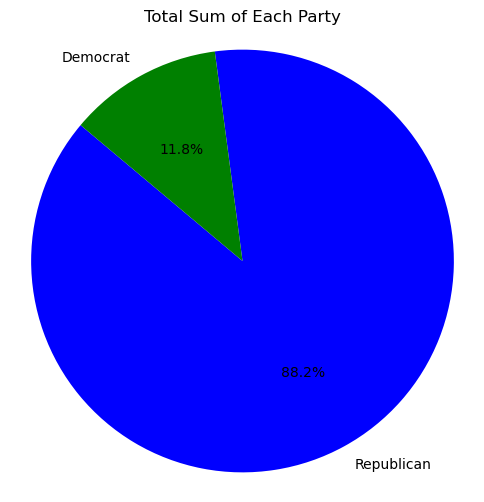

In [46]:
# use hvplot to create a pie chart
party_combine = pd.DataFrame({
    'party': ['Republican', 'Democrat'],
    'total_sum_amount': [rparty_total_sum_amount, dparty_total_sum_amount]
})

plt.figure(figsize=(6, 6))
plt.pie(party_combine['total_sum_amount'], labels=party_combine['party'], autopct='%1.1f%%', startangle=140, colors=['blue', 'green'])
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Total Sum of Each Party')
plt.show()